# Setup
To run this program correctly, start by clicking in the tab 'Kernel' and press 'Restart & Run All'. Afterwards, you can go move down to the next section 'Calculations' to use the actual program.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Javascript, display

In [2]:
def plot_transition(Initial_state, Final_state):
    difference_cm = Initial_state.value - Final_state.value
    difference_nm = 10**7/difference_cm

    print(f'There are {difference_cm} cm^-1 between {Initial_state.label} and {Final_state.label}.')
    print(f'This corresponds to {np.round(difference_nm,0)} nm.\n\n')


    x = np.linspace(300,900,1000)
    b = difference_nm
    a = 1
    c = 10
    f1 = a * np.exp(-(x-b)**2/(2*c**2))
    plt.figure(figsize = [10,5])
    plt.plot([b, b],[0, 2], '--', color = [0.8, 0.8, 0.8])
    plt.plot(x,f1, linewidth = 3, color = [0.6,0.6,0.6])
    plt.xlabel('Wavelength/nm')
    plt.ylabel('Intensity/A.U.')
    plt.xlim([450,650])
    plt.ylim([-0.005,1.02])
    plt.show()

In [3]:
Initial_state = widgets.Dropdown(
                options=[('F5',2029), ('F4',3275),('F3',4325),('F2',5035),('F1',5516),('F0',5800),('D4',20498)],
                description='Initial_state:',
                )
Final_state = widgets.Dropdown(
                options=[('F6',0), ('F5',2029), ('F4',3275),('F3',4325),('F2',5035),('F1',5516),('F0',5800),('D4',20498)],
                description='Final_state:',
                )

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Calculate energy difference and find spectral position",
                       layout=widgets.Layout(width='350px', height='30px'),style= {'button_color':'yellow'})
button.on_click(run_all)

# Calculations

The following code can be used to calculate the energy difference between two electronic states of terbium$^{3+}$, which can help in interpreting a spectrum and assigning the correct transitions. Use the dropdown menu to select an initial state (e.g. F0) and a final state (e.g. F6), which corresponds to the transition F$_0$ $\rightarrow$ F$_6$. Press the button that says 'Calculate energy difference and find spectral position' underneath to run the code. This calculates the energy difference between the two states, and a figure displaying the spectral position is displayed. 

In [4]:
display(Initial_state)
display(Final_state)
display(button)

Dropdown(description='Initial_state:', options=(('F5', 2029), ('F4', 3275), ('F3', 4325), ('F2', 5035), ('F1',…

Dropdown(description='Final_state:', options=(('F6', 0), ('F5', 2029), ('F4', 3275), ('F3', 4325), ('F2', 5035…

Button(description='Calculate energy difference and find spectral position', layout=Layout(height='30px', widt…

There are 2029 cm^-1 between F5 and F6.
This corresponds to 4929.0 nm.




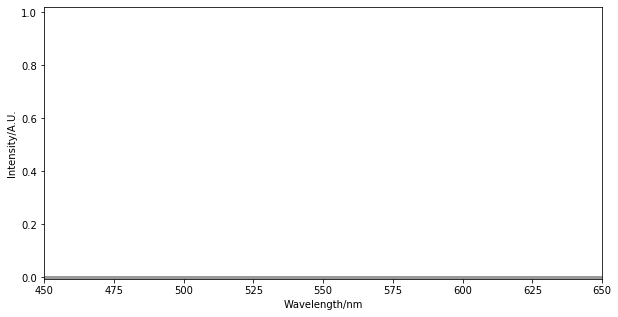

In [5]:
plot_transition(Initial_state, Final_state)